In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats

import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

import os
for dirname, _, filenames in os.walk('./input/NASA-bearing-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./input/NASA-bearing-dataset/merged_dataset_BearingTest_2.csv
./input/NASA-bearing-dataset/sample_1st.csv
./input/NASA-bearing-dataset/merged_dataset_BearingTest_1.csv
./input/NASA-bearing-dataset/sample_2nd.csv
./input/NASA-bearing-dataset/merged_dataset_BearingTest_3.csv
./input/NASA-bearing-dataset/sample_3rd.csv


# Basic EDA

In [2]:
# Read the CSV file and set first column as the dataframe index
dataset = pd.read_csv("./input/NASA-bearing-dataset/merged_dataset_BearingTest_2.csv", index_col=0)
dataset.describe()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
count,984.000000,984.000000,984.000000,984.000000
mean,0.080905,0.078532,0.081356,0.047822
std,0.040171,0.011779,0.011596,0.009541
min,0.001168,0.000767,0.000716,0.001699
25%,0.060765,0.074233,0.076832,0.043950
50%,0.062007,0.075203,0.078197,0.044524
75%,0.083223,0.077456,0.080600,0.048111
max,0.453335,0.161016,0.151299,0.119047


In [3]:
dataset.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-12 10:32:39,0.058333,0.071832,0.083242,0.043067
2004-02-12 10:42:39,0.058995,0.074006,0.084435,0.044541
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118


In [4]:
# The last rows shows the bearing failure (acceleration -> 0) 
dataset.tail()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-19 05:42:39,0.453335,0.161016,0.137440,0.119047
2004-02-19 05:52:39,0.337583,0.132400,0.144992,0.092125
2004-02-19 06:02:39,0.351111,0.152266,0.151299,0.100817
2004-02-19 06:12:39,0.001857,0.003732,0.003656,0.001786
2004-02-19 06:22:39,0.001168,0.000767,0.000716,0.001699


## Extract each bearing data and plot together the 4 signals

In [5]:
bearing1 = dataset['Bearing 1']
bearing1_index = bearing1.index.values
bearing2 = dataset['Bearing 2']
bearing2_index = bearing1.index.values
bearing3 = dataset['Bearing 3']
bearing3_index = bearing1.index.values
bearing4 = dataset['Bearing 4']
bearing4_index = bearing1.index.values

Number of plotted points before failure= 492


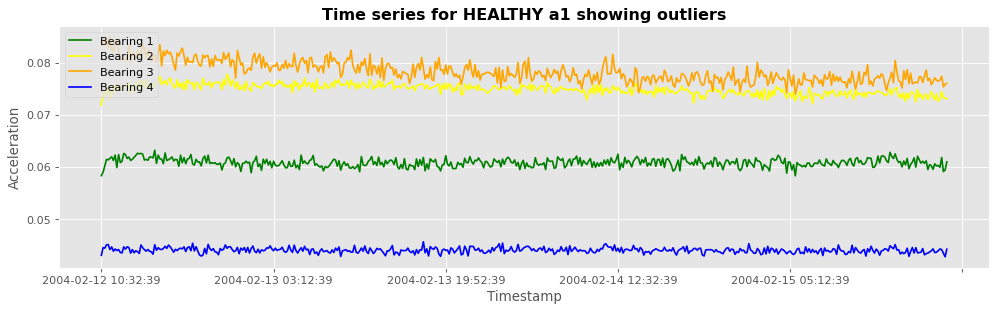

In [6]:
figure(figsize=(15, 4), dpi=80)

n_points = round(.50*bearing1.shape[0])
print("Number of plotted points before failure=", n_points)
      
bearing1[:n_points].plot(color='green', label='Bearing 1')
bearing2[:n_points].plot(color='yellow', label='Bearing 2')
bearing3[:n_points].plot(color='orange', label='Bearing 3')
bearing4[:n_points].plot(color='blue', label='Bearing 4')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.legend(loc="upper left")  
plt.title('Time series for HEALTHY a1 showing outliers', fontweight ="bold")
plt.show()

# Normalize the dataset

In [7]:
from sklearn import preprocessing

# Dataset is scaled so that maximum for every column is 1
scaler = preprocessing.MinMaxScaler()
dataset_scaled = pd.DataFrame(scaler.fit_transform(dataset), 
                              columns=dataset.columns, 
                              index=dataset.index)
dataset_scaled.describe()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
count,984.000000,984.000000,984.000000,984.000000
mean,0.176344,0.485273,0.535517,0.393047
std,0.088842,0.073507,0.077007,0.081305
min,0.000000,0.000000,0.000000,0.000000
25%,0.131803,0.458450,0.505473,0.360049
50%,0.134550,0.464499,0.514541,0.364941
75%,0.181470,0.478561,0.530498,0.395511
max,1.000000,1.000000,1.000000,1.000000


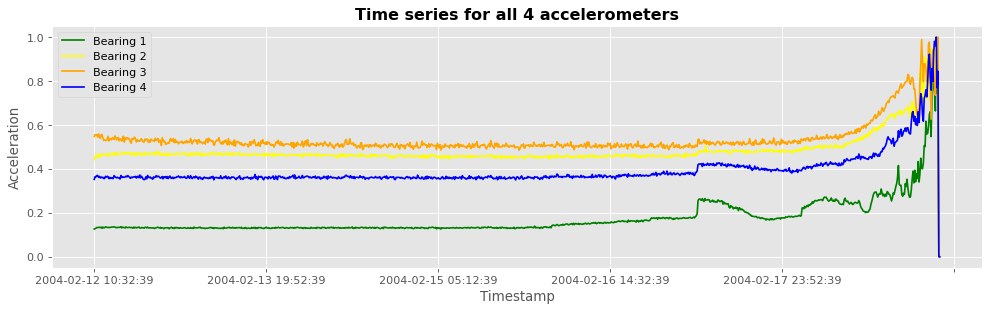

In [8]:
# Let's plot the dataset again
bearing1 = dataset_scaled['Bearing 1']
bearing1_index = bearing1.index.values
bearing2 = dataset_scaled['Bearing 2']
bearing2_index = bearing1.index.values
bearing3 = dataset_scaled['Bearing 3']
bearing3_index = bearing1.index.values
bearing4 = dataset_scaled['Bearing 4']
bearing4_index = bearing1.index.values

figure(figsize=(15, 4), dpi=80)

bearing1.plot(color='green', label='Bearing 1')
bearing2.plot(color='yellow', label='Bearing 2')
bearing3.plot(color='orange', label='Bearing 3')
bearing4.plot(color='blue', label='Bearing 4')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.legend(loc="upper left")  
plt.title('Time series for all 4 accelerometers', fontweight ="bold")
plt.show()

# PCA model: Principal Components analysis
Apply dimensionality reduction to deal with only 2 signals

In [9]:
from sklearn.decomposition import PCA

# Compute PCA
pca = PCA(n_components=4, svd_solver= 'full')
dataset_PCA = pca.fit_transform(dataset_scaled)

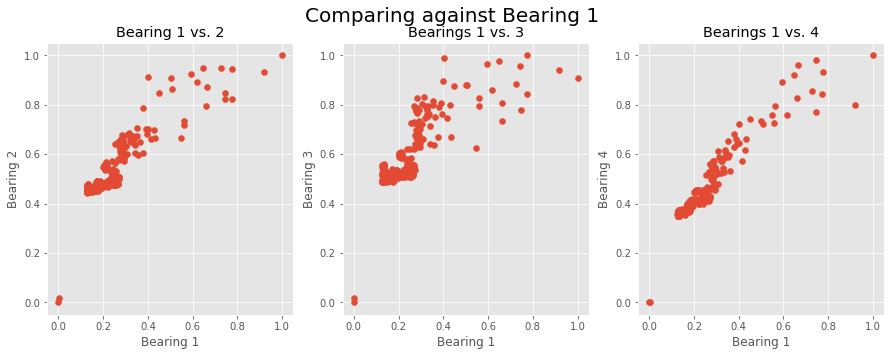

In [10]:
fig, axes = plt.subplots(1,3, figsize=(15, 5))
fig.suptitle('Comparing against Bearing 1', fontsize=20)

axes[0].scatter(np.array(dataset_scaled['Bearing 1']), np.array(dataset_scaled['Bearing 2']))
axes[0].set_xlabel('Bearing 1')
axes[0].set_ylabel('Bearing 2')
axes[0].set_title('Bearing 1 vs. 2')

axes[1].scatter(np.array(dataset_scaled['Bearing 1']), np.array(dataset_scaled['Bearing 3']))
axes[1].set_xlabel('Bearing 1')
axes[1].set_ylabel('Bearing 3')
axes[1].set_title('Bearings 1 vs. 3')

axes[2].scatter(np.array(dataset_scaled['Bearing 1']), np.array(dataset_scaled['Bearing 4']))
axes[2].set_xlabel('Bearing 1')
axes[2].set_ylabel('Bearing 4')
axes[2].set_title('Bearings 1 vs. 4')

plt.show()

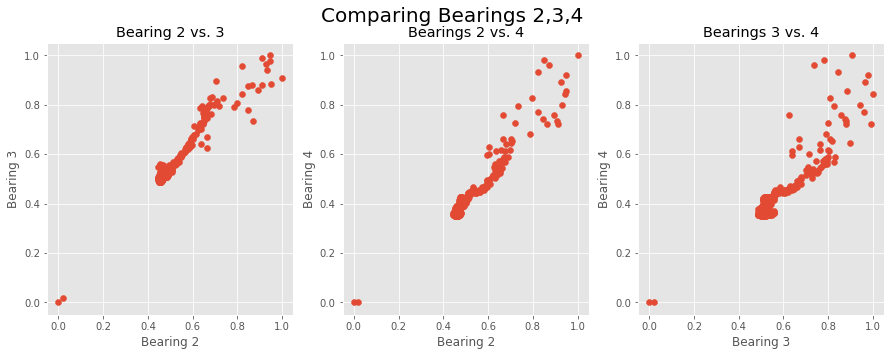

In [11]:
fig, axes = plt.subplots(1,3, figsize=(15, 5))
fig.suptitle('Comparing Bearings 2,3,4', fontsize=20)
axes[0].scatter(np.array(dataset_scaled['Bearing 2']), np.array(dataset_scaled['Bearing 3']))
axes[0].set_xlabel('Bearing 2')
axes[0].set_ylabel('Bearing 3')
axes[0].set_title('Bearing 2 vs. 3')

axes[1].scatter(np.array(dataset_scaled['Bearing 2']), np.array(dataset_scaled['Bearing 4']))
axes[1].set_xlabel('Bearing 2')
axes[1].set_ylabel('Bearing 4')
axes[1].set_title('Bearings 2 vs. 4')

axes[2].scatter(np.array(dataset_scaled['Bearing 3']), np.array(dataset_scaled['Bearing 4']))
axes[2].set_xlabel('Bearing 3')
axes[2].set_ylabel('Bearing 4')
axes[2].set_title('Bearings 3 vs. 4')

plt.show()

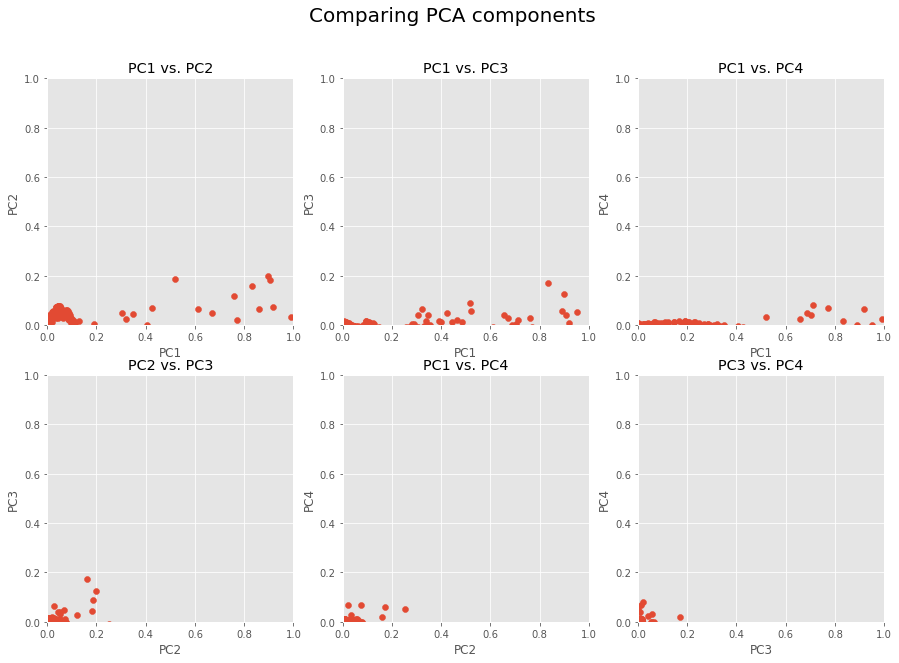

In [12]:
# Plot PCA compared to initial data
fig, axes = plt.subplots(2,3, figsize=(15, 10))
fig.suptitle('Comparing PCA components', fontsize=20)

# Comparing against dominant PC1
axes[0,0].scatter(dataset_PCA[:,0], dataset_PCA[:,1])
axes[0,0].set_xlabel('PC1')
axes[0,0].set_xlim(0,1)
axes[0,0].set_ylabel('PC2')
axes[0,0].set_ylim(0,1)
axes[0,0].set_title('PC1 vs. PC2')

axes[0,1].scatter(dataset_PCA[:,0], dataset_PCA[:,2])
axes[0,1].set_xlabel('PC1')
axes[0,1].set_xlim(0,1)
axes[0,1].set_ylabel('PC3')
axes[0,1].set_ylim(0,1)
axes[0,1].set_title('PC1 vs. PC3')

axes[0,2].scatter(dataset_PCA[:,0], dataset_PCA[:,3])
axes[0,2].set_xlabel('PC1')
axes[0,2].set_xlim(0,1)
axes[0,2].set_ylabel('PC4')
axes[0,2].set_ylim(0,1)
axes[0,2].set_title('PC1 vs. PC4')

# Comparing non dominant PC2,3,4
axes[1,0].scatter(dataset_PCA[:,1], dataset_PCA[:,2])
axes[1,0].set_xlabel('PC2')
axes[1,0].set_xlim(0,1)
axes[1,0].set_ylabel('PC3')
axes[1,0].set_ylim(0,1)
axes[1,0].set_title('PC2 vs. PC3')

axes[1,1].scatter(dataset_PCA[:,1], dataset_PCA[:,3])
axes[1,1].set_xlabel('PC2')
axes[1,1].set_xlim(0,1)
axes[1,1].set_ylabel('PC4')
axes[1,1].set_ylim(0,1)
axes[1,1].set_title('PC1 vs. PC4')

axes[1,2].scatter(dataset_PCA[:,2], dataset_PCA[:,3])
axes[1,2].set_xlabel('PC3')
axes[1,2].set_xlim(0,1)
axes[1,2].set_ylabel('PC4')
axes[1,2].set_ylim(0,1)
axes[1,2].set_title('PC3 vs. PC4')


plt.show()

## Variance ratio
We can see that in the PCA space, the variance is maximized along PC1 (explains 93% of the variance) and PC2 (explains 5.5%)

In [13]:
# Print numbers with 3 decimal places and skip scientific notation
np.set_printoptions(precision=3, suppress=True)

In [14]:
print(pca.explained_variance_ratio_)

[0.932 0.056 0.008 0.004]


** CONCLUSION:** *PC1 retains most of the variance*

### Maximum variance proof
Using the covariance matrix of the reduced space

In [15]:
np.cov(dataset_scaled.T)*1000

array([[7.893, 5.799, 5.525, 6.827],
       [5.799, 5.403, 5.464, 5.758],
       [5.525, 5.464, 5.93 , 5.684],
       [6.827, 5.758, 5.684, 6.611]])

In [16]:
np.cov(dataset_PCA.T)*1000

array([[24.091,  0.   , -0.   , -0.   ],
       [ 0.   ,  1.444,  0.   , -0.   ],
       [-0.   ,  0.   ,  0.209, -0.   ],
       [-0.   , -0.   , -0.   ,  0.093]])

The values on the diagonal (variances) are equal to the actual eigenvalues of the covariance in the PCA space:

In [17]:
pca.explained_variance_

array([0.024, 0.001, 0.   , 0.   ])

## Feature importance
`pca.components_` has shape `[n_components, n_features]`
 - Features correspond to every signal bearing 1, 2, 3 and 4

In [18]:
print(abs( pca.components_ ))

[[0.544 0.465 0.468 0.518]
 [0.7   0.287 0.645 0.105]
 [0.461 0.17  0.455 0.743]
 [0.032 0.82  0.397 0.411]]


In [19]:
# Let's take the first row (PC1 is the dominant component) has the larger values
print(abs( pca.components_[0,:] ))

[0.544 0.465 0.468 0.518]


Every item is a feature, and shows the contribution to PC1

# Base analysis on dominant PCA components

In [20]:
dataset_PCA_ = pd.DataFrame(dataset_PCA).loc[:,:1]
dataset_PCA_.columns = ['Dimension 1', 'Dimension 2']
dataset_PCA_.describe()

,Dimension 1,Dimension 2
count,9.840000e+02,9.840000e+02
mean,4.310012e-17,5.906522e-17
std,1.552130e-01,3.799479e-02
min,-7.758793e-01,-2.223409e-01
25%,-6.391900e-02,-1.751880e-02
50%,-5.209752e-02,-5.921931e-03
75%,-5.681156e-03,1.486332e-02
max,1.176527e+00,3.202650e-01


In [21]:
# Make row index be the timestamp
dataset_PCA_.index = dataset_scaled.index
dataset_PCA_.head()

,Dimension 1,Dimension 2
2004-02-12 10:32:39,-0.061765,-0.035275
2004-02-12 10:42:39,-0.044440,-0.041943
2004-02-12 10:52:39,-0.044318,-0.038321
2004-02-12 11:02:39,-0.039493,-0.037457
2004-02-12 11:12:39,-0.039354,-0.033786


In [22]:
# Normalize PCA data
dataset_PCA_n = pd.DataFrame(scaler.fit_transform(dataset_PCA_), 
                              columns=dataset_PCA_.columns, 
                              index=dataset_PCA_.index)
dataset_PCA_n.describe()

,Dimension 1,Dimension 2
count,984.000000,984.000000
mean,0.397396,0.409765
std,0.079498,0.070023
min,0.000000,0.000000
25%,0.364658,0.377479
50%,0.370713,0.398851
75%,0.394487,0.437157
max,1.000000,1.000000


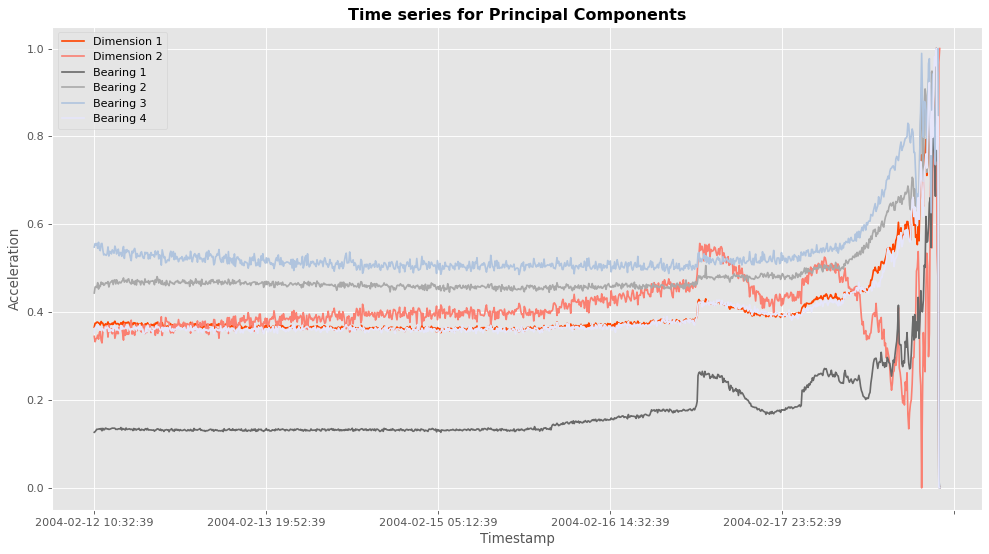

In [23]:
# Let's plot the Principal Components
dimension1 = dataset_PCA_n['Dimension 1']
dimension1_index = dimension1.index.values
dimension2 = dataset_PCA_n['Dimension 2']
dimension2_index = dimension2.index.values


figure(figsize=(15, 8), dpi=80)

dimension1.plot(color='orangered', label='Dimension 1')
dimension2.plot(color='salmon', label='Dimension 2')
bearing1.plot(color='dimgray', label='Bearing 1')
bearing2.plot(color='darkgray', label='Bearing 2')
bearing3.plot(color='lightsteelblue', label='Bearing 3')
bearing4.plot(color='lavender', label='Bearing 4')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.legend(loc="upper left")  
plt.title('Time series for Principal Components', fontweight ="bold")
plt.show()

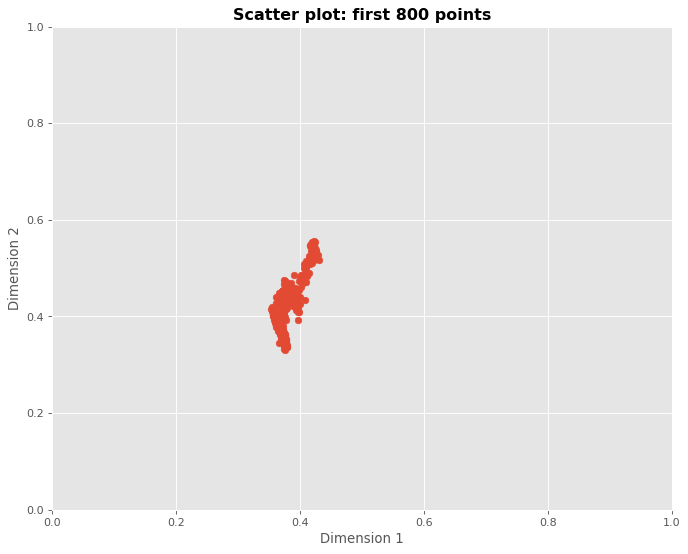

In [24]:
# VISUALIZE THE DATA IN THE PCA DIMENSIONAL SPACE
# Transform dataframe columns to np arrays
sample_size = 800
#sample_size = dimension1.shape[0] # =984
dim1_arr = np.array(dimension1)[:sample_size]
dim2_arr = np.array(dimension2)[:sample_size]

figure(figsize=(10, 8), dpi=80)
# Create a meshgrid
xx, yy = np.meshgrid(np.linspace(0, 1, 200),
                     np.linspace(0, 1, 200))
# scatter plot
plt.scatter(dim1_arr, dim2_arr)
plt.xlim((0,1))
plt.ylim((0,1))
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter plot: first 800 points', fontweight ="bold")
plt.show()

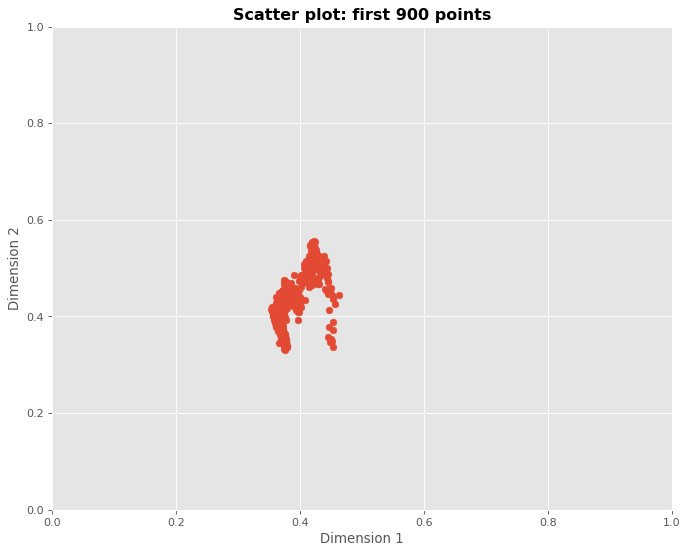

In [25]:
# Look at how the points are spreading in the index range 800-900
sample_size = 900
dim1_arr = np.array(dimension1)[:sample_size]
dim2_arr = np.array(dimension2)[:sample_size]

figure(figsize=(10, 8), dpi=80)
# Create a meshgrid
xx, yy = np.meshgrid(np.linspace(0, 1, 200),
                     np.linspace(0, 1, 200))
# scatter plot
plt.scatter(dim1_arr, dim2_arr)
plt.xlim((0,1))
plt.ylim((0,1))
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter plot: first 900 points', fontweight ="bold")
plt.show()

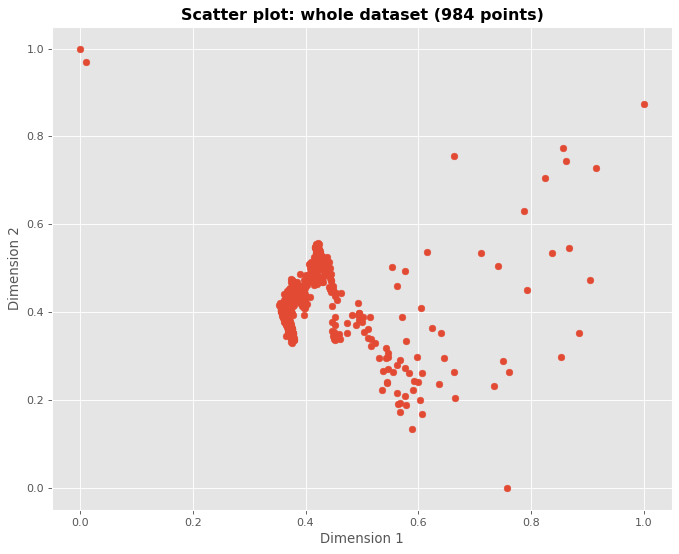

In [26]:
# Whole data (984 points)
# You can see how the dots are spreaded when approaching the bearing failure
dim1_arr = np.array(dimension1)
dim2_arr = np.array(dimension2)

figure(figsize=(10, 8), dpi=80)
# Create a meshgrid
xx, yy = np.meshgrid(np.linspace(0, 1, 200),
                     np.linspace(0, 1, 200))
# scatter plot
plt.scatter(dim1_arr, dim2_arr)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter plot: whole dataset (984 points)', fontweight ="bold")
plt.show()

# PCA for labeled dataset (Iris)
Tutorial: [PCA clearly explained](https://pub.towardsai.net/pca-clearly-explained-when-why-how-to-use-it-and-feature-importance-a-guide-in-python-56b3da72d9d1)

https://archive.ics.uci.edu/ml/datasets/iris
Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
 - Iris Setosa
 - Iris Versicolour
 - Iris Virginica

In [27]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()

In [28]:
iris.data[:5][:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [29]:
np.unique(iris.target)

array([0, 1, 2])

In [30]:
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

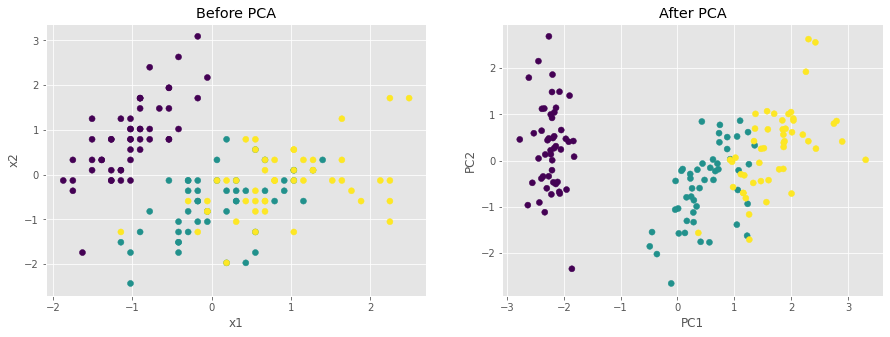

In [31]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')

axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [32]:
print(pca.explained_variance_ratio_)

[0.73  0.229]


## Biplot representation

In [33]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

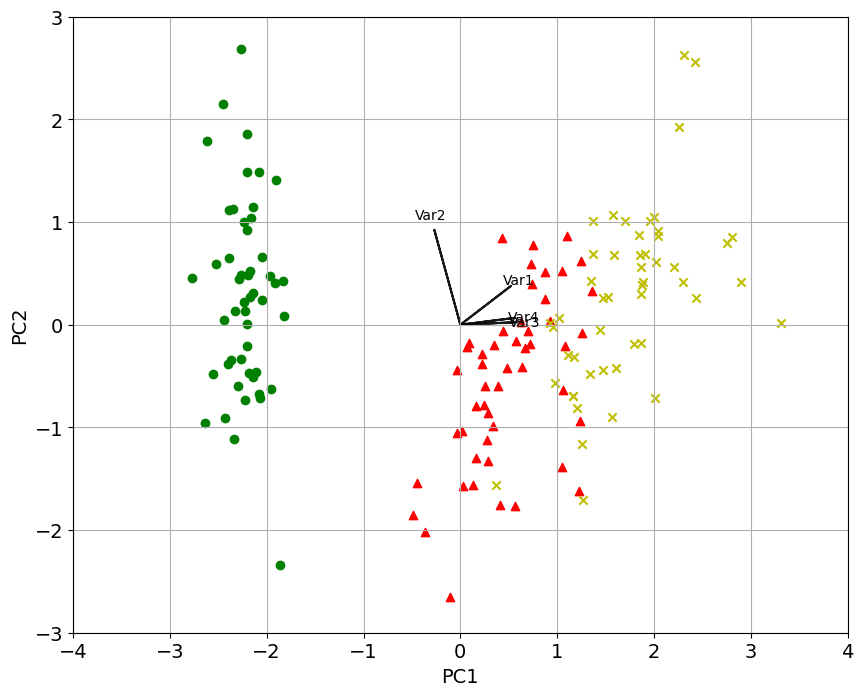

In [34]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

We can again verify visually that a) the variance is maximized and b) that feature 1, 3 and 4 are the most important for PC1. Similarly, feature 2 and then 1 are the most important for PC2.
Furthermore, arrows (variables/features) that point into the same direction indicate correlation between the variables that they represent whereas, the arrows heading in opposite directions indicate a contrast between the variables they represent.

In [35]:
# Var 3 and Var 4 are extremely positively correlated
np.corrcoef(X[:,2], X[:,3])[1,0]
0.9628654314027957

0.9628654314027957

In [36]:
# Var 2and Var 3 are negatively correlated
np.corrcoef(X[:,1], X[:,2])[1,0]

-0.42844010433054014